Gallup Q12 Explanation

The Gallup Q12 is a standardized employee engagement survey created by Gallup to measure key aspects of workplace engagement. It consists of 12 statements that employees rate on a Likert scale (1–5). The Q12 survey helps organizations identify how engaged their employees are, which directly impacts retention, productivity, and workplace culture.

The Q12 questions reflect the most critical workplace needs:

Q1: I know what is expected of me at work.
Q2: I have the materials and equipment I need to do my work right.
Q3: At work, I have the opportunity to do what I do best every day.
Q4: In the last seven days, I have received recognition or praise for doing good work.
Q5: My supervisor, or someone at work, seems to care about me as a person.
Q6: There is someone at work who encourages my development.
Q7: At work, my opinions seem to count.
Q8: The mission or purpose of my company makes me feel my job is important.
Q9: My associates or fellow employees are committed to doing quality work.
Q10: I have a best friend at work.
Q11: In the last six months, someone at work has talked to me about my progress.
Q12: This last year, I have had opportunities at work to learn and grow.

Variable Definitions
Age: The employee's age (in years).
Tenure: The number of years the employee has been with the company.
Gender: The employee's gender (Male or Female).
Department: The department the employee works in (e.g., HR, Sales, IT).
Salary: The annual salary of the employee (in currency units).
Overtime: Whether the employee works overtime (Yes or No).
Distance_to_Work: The distance the employee commutes to work (in kilometers).
Attrition: Whether the employee has left the company (Yes) or stayed (No).

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of employees (adjust as needed)
num_employees = 5000

# Define Likert scale (1-5) weights for engagement levels
def generate_likert_scores(engagement_level="mixed"):
    if engagement_level == "high":
        return np.random.choice([4, 5], p=[0.4, 0.6])
    elif engagement_level == "low":
        return np.random.choice([1, 2], p=[0.6, 0.4])
    else:  # Mixed engagement
        return np.random.choice([1, 2, 3, 4, 5], p=[0.15, 0.15, 0.3, 0.25, 0.15])

# Generate survey responses (Q1-Q12)
def generate_q12_responses(engagement_level):
    return [generate_likert_scores(engagement_level) for _ in range(12)]

# Generate demographics and workplace metrics
def generate_employee_data(emp_id):
    age = np.random.randint(22, 60)
    tenure = max(0, age - np.random.randint(20, 35))  # Tenure correlates with age
    gender = random.choices(['Male', 'Female'], weights=[0.7, 0.3])[0]  # 70% Male, 30% Female
    department = random.choices(['Development', 'Support', 'QA', 'DevOps', 'Management'], 
                                weights=[0.4, 0.2, 0.15, 0.15, 0.1])[0]  # IT-specific departments
    salary = np.random.randint(50000, 150000)  # Higher salary range for IT
    overtime = random.choices(['Yes', 'No'], weights=[0.4, 0.6])[0]  # 40% Overtime in IT
    distance_to_work = abs(np.random.normal(15, 10))  # Normally distributed distance, avg 15km

    # Determine engagement level to influence attrition
    engagement_level = random.choices(["high", "low", "mixed"], weights=[0.3, 0.4, 0.3])[0]
    q12_scores = generate_q12_responses(engagement_level)
    
    # Attrition probability based on engagement
    if engagement_level == "high":
        attrition = np.random.choice(["Yes", "No"], p=[0.1, 0.9])
    elif engagement_level == "low":
        attrition = np.random.choice(["Yes", "No"], p=[0.6, 0.4])
    else:  # Mixed engagement
        attrition = np.random.choice(["Yes", "No"], p=[0.3, 0.7])
    
    # Return all data as a dictionary
    return {
        'Employee_ID': emp_id,
        'Q1': q12_scores[0], 'Q2': q12_scores[1], 'Q3': q12_scores[2], 'Q4': q12_scores[3],
        'Q5': q12_scores[4], 'Q6': q12_scores[5], 'Q7': q12_scores[6], 'Q8': q12_scores[7],
        'Q9': q12_scores[8], 'Q10': q12_scores[9], 'Q11': q12_scores[10], 'Q12': q12_scores[11],
        'Age': age, 'Tenure': tenure, 'Gender': gender, 'Department': department,
        'Salary': salary, 'Overtime': overtime, 'Distance_to_Work': round(distance_to_work, 2),
        'Attrition': attrition
    }

# Generate the dataset
data = [generate_employee_data(emp_id) for emp_id in range(1, num_employees + 1)]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first rows
print(df.head())

# Save the dataset to CSV for further use
df.to_csv("employee_attrition_synthetic_IT.csv", index=False)
print("Synthetic IT dataset saved to 'employee_attrition_synthetic_IT.csv'")


   Employee_ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q11  Q12  Age  \
0            1   4   5   5   5   4   5   5   4   4  ...    4    5   50   
1            2   4   4   4   5   5   4   5   5   4  ...    4    4   48   
2            3   2   1   1   1   1   2   1   2   1  ...    1    1   35   
3            4   1   2   2   1   1   1   2   2   2  ...    1    2   47   
4            5   4   5   5   5   5   4   4   4   5  ...    4    4   50   

   Tenure  Gender   Department  Salary  Overtime Distance_to_Work  Attrition  
0      16    Male  Development  126820       Yes            12.66         No  
1      18  Female           QA  134478        No            12.66         No  
2      14    Male  Development   93001       Yes             8.99         No  
3      16    Male  Development  115697        No            12.08         No  
4      16    Male      Support  111228        No             8.23         No  

[5 rows x 21 columns]
Synthetic IT dataset saved to 'employee_attrition_syntheti

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       1000 non-null   int64  
 1   Q1                1000 non-null   int32  
 2   Q2                1000 non-null   int32  
 3   Q3                1000 non-null   int32  
 4   Q4                1000 non-null   int32  
 5   Q5                1000 non-null   int32  
 6   Q6                1000 non-null   int32  
 7   Q7                1000 non-null   int32  
 8   Q8                1000 non-null   int32  
 9   Q9                1000 non-null   int32  
 10  Q10               1000 non-null   int32  
 11  Q11               1000 non-null   int32  
 12  Q12               1000 non-null   int32  
 13  Age               1000 non-null   int64  
 14  Tenure            1000 non-null   int64  
 15  Gender            1000 non-null   object 
 16  Department        1000 non-null   object 
 

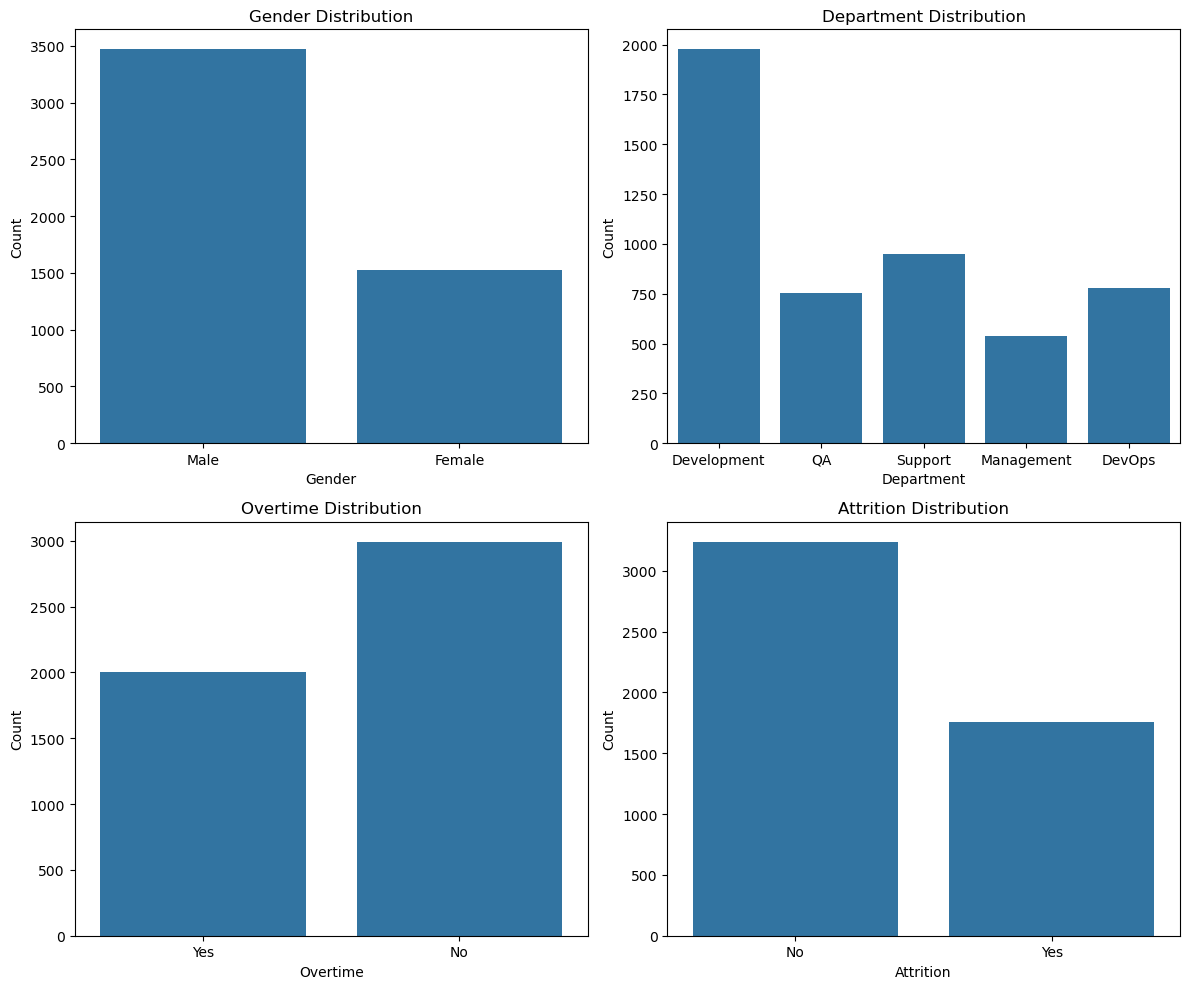

In [11]:
# Visualization of categorical variables
def plot_categorical_distributions(df):
    plt.figure(figsize=(12, 10))
    
    # Gender Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(x='Gender', data=df)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Department Distribution
    plt.subplot(2, 2, 2)
    sns.countplot(x='Department', data=df)
    plt.title('Department Distribution')
    plt.xlabel('Department')
    plt.ylabel('Count')
    
    # Overtime Distribution
    plt.subplot(2, 2, 3)
    sns.countplot(x='Overtime', data=df)
    plt.title('Overtime Distribution')
    plt.xlabel('Overtime')
    plt.ylabel('Count')
    
    # Attrition Distribution
    plt.subplot(2, 2, 4)
    sns.countplot(x='Attrition', data=df)
    plt.title('Attrition Distribution')
    plt.xlabel('Attrition')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_categorical_distributions(df)